In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
np.seed = 123
x = np.random.uniform(-1,1,(10000,2))
y = np.sin(np.pi*x)

In [37]:
#y = b
constant_models = np.mean(y,axis=1)

#y = mx + b
#w = (X.TX)^-1X.TY
#w sum sum x_i*y_j / sum sum (x_i*x_j)
slopes = (y[:,1] - y[:,0]) / (x[:,1] - x[:,0])
intercepts = y[:,0] - slopes*x[:,0]

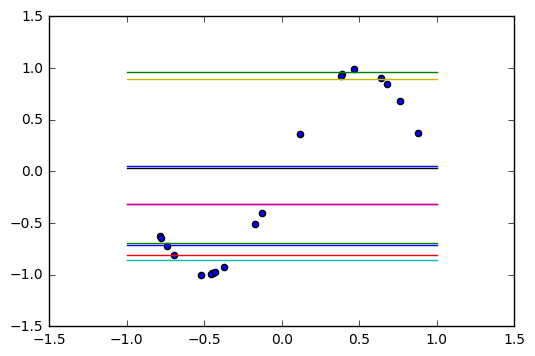

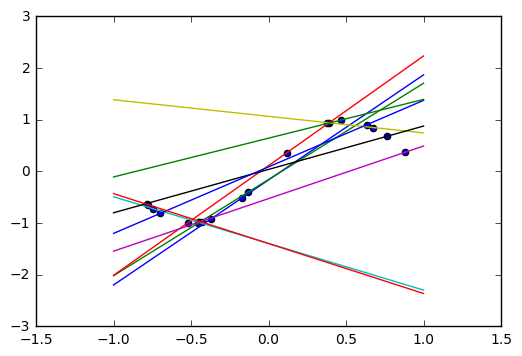

In [44]:
for i, model in enumerate(constant_models[:10]):
    plt.scatter(x[i,:],y[i,:])
    plt.plot([-1,1], [model, model])
plt.show()
# plt.scatter(x[:,0],y[:,0])
for i, (slope, intercept) in enumerate(zip(slopes, intercepts[:10])):
    plt.scatter(x[i,:],y[i,:])
    xleft = -1
    xright = 1
    plt.plot([xleft,xright], [intercept+xleft*slope, intercept+xright*slope])   

In [5]:
average_constant_model = constant_models.mean()
average_constant_model

-0.0007790390170165069

In [19]:
# (m_1*x + b_1 + m_2*x + b_2)/2
# (m_1*x + m_2*x + b_1 + b_2)/2
# ((m_1+m_2)*x + (b_1+b_2))/2
average_slope = slopes.mean()
average_intercept = intercepts.mean()
print("g_avg = {} x + {}".format(average_slope, average_intercept))

g_avg = 0.757505419038496 x + 0.01821807919949479


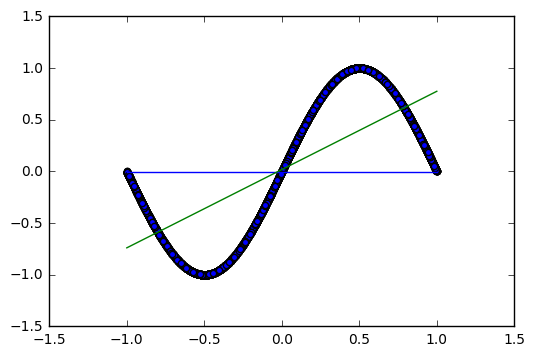

In [7]:
plt.scatter(x[:,0],y[:,0])
plt.plot([-1,1], [average_constant_model, average_constant_model])
plt.plot([-1,1], [average_intercept-average_slope, average_intercept+average_slope])

In [8]:
# bias = mean((gbar(x)-f(x))^2) 
bias_constant_model = np.square(average_constant_model - y.reshape(-1)).sum()/y.reshape(-1).shape[0]

preds = average_slope*x.reshape(-1)+average_intercept
bias_linear_model = np.square(preds - y.reshape(-1)).sum()/y.reshape(-1).shape[0]
print(bias_constant_model, bias_linear_model)

0.5020776770870579 0.20987710349092525


In [45]:
#E((g-gbar)^2)
var_constant_model = np.square(constant_models).mean() - np.square(constant_models.mean())

np.linspace(-1,1,100)
preds = slopes.reshape(-1,1)*np.linspace(-1,1,100).reshape(1,-1) + intercepts.reshape(-1,1)
per_point_var = np.square(preds - preds.mean(axis=0)).mean(axis=0)
var_linear_model = np.square(preds - preds.mean(axis=0)).mean()

print(var_constant_model,var_linear_model)

0.24503415904217013 1.668724892121674


In [46]:
# a=np.array([1,2,3])
# b=np.array([-1,0,1])
# a.reshape(-1,1)*b.reshape(1,-1)

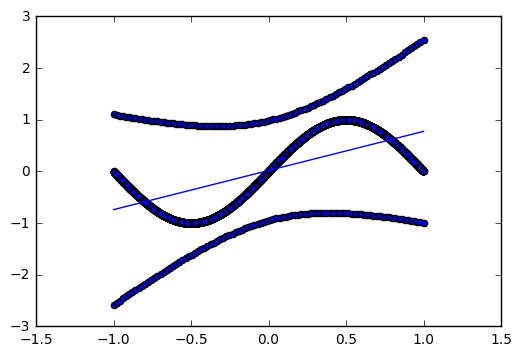

In [31]:
preds_plus  = average_intercept+average_slope*np.linspace(-1,1,100)+np.sqrt(per_point_var)
preds_minus = average_intercept+average_slope*np.linspace(-1,1,100)-np.sqrt(per_point_var)
plt.scatter(x[:,0],y[:,0])
plt.plot([-1,1], [average_intercept-average_slope, average_intercept+average_slope])
plt.scatter(np.linspace(-1,1,100), preds_plus)
plt.scatter(np.linspace(-1,1,100), preds_minus)

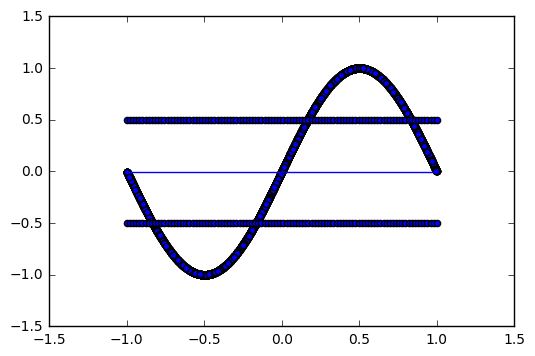

In [34]:
plt.scatter(x[:,0],y[:,0])
plt.plot([-1,1], [average_constant_model, average_constant_model])
plt.scatter(np.linspace(-1,1,100), np.ones(100)*average_constant_model+np.sqrt(0.2521681856302118))
plt.scatter(np.linspace(-1,1,100), np.ones(100)*average_constant_model-np.sqrt(0.2521681856302118))